In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
df=pd.read_csv('salaries.txt')

In [34]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [35]:
#dividing the data
inputs=df.drop(['salary_more_then_100k'],axis=1)

In [36]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [37]:
target=df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [38]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [39]:
#creating a LabelEncoder object
le=LabelEncoder()

In [40]:
#label encoding
inputs['company_n']=le.fit_transform(inputs['company'])

In [41]:
inputs

,company,job,degree,company_n
0,google,sales executive,bachelors,2
1,google,sales executive,masters,2
2,google,business manager,bachelors,2
3,google,business manager,masters,2
4,google,computer programmer,bachelors,2
5,google,computer programmer,masters,2
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,0


In [42]:
#similarly label encoding
inputs['job_n']=le.fit_transform(inputs['job'])
inputs['degree_n']=le.fit_transform(inputs['degree'])

In [43]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [44]:
#dropping the categorical variables
inputs.drop(['company','job','degree'],axis=1,inplace=True)
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.8)

In [50]:
#decision treec
from sklearn.tree import DecisionTreeClassifier

In [51]:
dmodel=DecisionTreeClassifier()

In [52]:
dmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
dmodel.score(X_test,y_test)

0.6153846153846154

In [54]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=dmodel.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[2, 3],
       [2, 6]], dtype=int64)

Text(33.0, 0.5, 'actual')

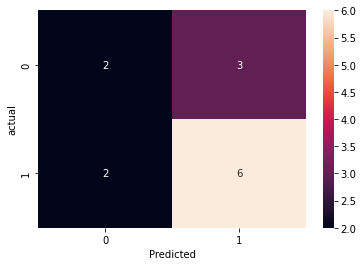

In [56]:
plt.figure('Confusion matrix')
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('actual')